### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [552]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import uniform, norm
import plotly.express as px
import plotly.graph_objs as go

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [553]:
data = pd.read_csv('data/coupons.csv')

In [554]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [532]:
data.sample(10)

destination  passanger weather  temperature  time  \
6585   No Urgent Place  Friend(s)   Sunny           80   6PM   
4123              Home      Alone   Sunny           80  10PM   
2110              Home      Alone   Sunny           80   6PM   
1543              Work      Alone   Sunny           55   7AM   
11057             Work      Alone   Sunny           80   7AM   
3717   No Urgent Place  Friend(s)   Sunny           80   2PM   
7611   No Urgent Place     Kid(s)   Sunny           55   2PM   
4456   No Urgent Place      Alone   Sunny           80  10AM   
9232   No Urgent Place    Partner   Sunny           55   2PM   
4146              Work      Alone   Sunny           80   7AM   

                  coupon expiration  gender     age      maritalStatus  ...  \
6585   Restaurant(20-50)         2h    Male      36    Married partner  ...   
4123     Restaurant(<20)         2h    Male      31    Married partner  ...   
2110        Coffee House         2h  Female      26             Single  ...   
1543     Restaurant(<20)         1d  Female      36    Married partner  ...   
11057  Restaurant(20-50)         2h    Male      46             Single  ...   
3717        Coffee House         2h  Female  50plus             Single  ...   
7611        Coffee House         1d  Female      36  Unmarried partner  ...   
4456                 Bar         1d  Female      36             Single  ...   
9232                 Bar         1d    Male  50plus    Married partner  ...   
4146        Coffee House         2h  Female      26    Married partner  ...   

       CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
6585           NaN     less1                less1            never   
4123         never       1~3                  1~3            never   
2110           1~3       gt8                  4~8              1~3   
1543           1~3       1~3                less1            less1   
11057          1~3       4~8                  4~8              4~8   
3717         less1       1~3                  1~3              1~3   
7611           1~3     less1                  1~3              4~8   
4456         never       4~8                  1~3            less1   
9232         never       1~3                  1~3            less1   
4146           gt8       4~8                  gt8              1~3   

      toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
6585                 1                 1                 0              0   
4123                 1                 0                 0              1   
2110                 1                 0                 0              0   
1543                 1                 0                 0              0   
11057                1                 0                 0              1   
3717                 1                 1                 0              0   
7611                 1                 1                 0              0   
4456                 1                 0                 0              0   
9232                 1                 0                 0              0   
4146                 1                 0                 0              1   

      direction_opp  Y  
6585              1  0  
4123              0  0  
2110              1  1  
1543              1  1  
11057             0  1  
3717              1  1  
7611              1  1  
4456              1  0  
9232              1  1  
4146              0  1  

[10 rows x 26 columns]

In [555]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

2. Investigate the dataset for missing or problematic data.

In [556]:
data.shape

(12684, 26)

In [557]:
# Tried to look at null values for all the columns
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [558]:
#examining null value data
data.loc[data['CoffeeHouse'].isnull()].sample(10)

destination  passanger weather  temperature  time  \
853    No Urgent Place    Partner   Sunny           80  10AM   
3137   No Urgent Place  Friend(s)   Sunny           80  10AM   
12393  No Urgent Place     Kid(s)   Snowy           30   6PM   
11845  No Urgent Place  Friend(s)   Sunny           80   6PM   
11853  No Urgent Place    Partner   Rainy           55   6PM   
7360   No Urgent Place    Partner   Rainy           55   2PM   
515               Work      Alone   Sunny           55   7AM   
12397  No Urgent Place  Friend(s)   Sunny           30  10AM   
3358   No Urgent Place  Friend(s)   Sunny           55   2PM   
5413   No Urgent Place      Alone   Sunny           80  10AM   

                      coupon expiration  gender     age      maritalStatus  \
853        Restaurant(20-50)         1d    Male      41    Married partner   
3137                     Bar         1d    Male      21             Single   
12393                    Bar         1d  Female      36    Married partner   
11845        Restaurant(<20)         2h    Male      26  Unmarried partner   
11853                    Bar         2h    Male      26  Unmarried partner   
7360         Restaurant(<20)         2h    Male      26    Married partner   
515          Restaurant(<20)         1d    Male      26  Unmarried partner   
12397  Carry out & Take away         2h  Female      36    Married partner   
3358            Coffee House         2h    Male  50plus           Divorced   
5413                     Bar         1d  Female      26             Single   

       ...  CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
853    ...          NaN       NaN                  NaN              NaN   
3137   ...          NaN       NaN                  NaN              NaN   
12393  ...          NaN       1~3                  1~3              1~3   
11845  ...          NaN       1~3                never            never   
11853  ...          NaN       1~3                never            never   
7360   ...          NaN       1~3                  1~3            less1   
515    ...          NaN     less1                less1            less1   
12397  ...          NaN       1~3                  1~3              1~3   
3358   ...          NaN       NaN                  NaN              NaN   
5413   ...          NaN       1~3                  1~3            less1   

      toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
853                  1                 0                 0              0   
3137                 1                 0                 0              0   
12393                1                 0                 0              0   
11845                1                 0                 0              0   
11853                1                 1                 0              0   
7360                 1                 1                 0              0   
515                  1                 0                 0              0   
12397                1                 0                 0              0   
3358                 1                 0                 0              0   
5413                 1                 0                 0              0   

      direction_opp  Y  
853               1  1  
3137              1  0  
12393             1  0  
11845             1  0  
11853             1  0  
7360              1  1  
515               1  1  
12397             1  0  
3358              1  1  
5413              1  0  

[10 rows x 26 columns]

In [559]:
data.loc[data['CarryAway'].isnull()].sample(5)

destination  passanger weather  temperature  time  \
3141  No Urgent Place  Friend(s)   Sunny           55   2PM   
8610  No Urgent Place  Friend(s)   Sunny           80   2PM   
17               Work      Alone   Sunny           55   7AM   
6     No Urgent Place  Friend(s)   Sunny           55   2PM   
4732             Home      Alone   Sunny           80  10PM   

                     coupon expiration  gender      age      maritalStatus  \
3141           Coffee House         2h    Male       21             Single   
8610      Restaurant(20-50)         2h  Female   50plus    Married partner   
17                      Bar         1d  Female       21  Unmarried partner   
6     Carry out & Take away         1d  Female       21  Unmarried partner   
4732        Restaurant(<20)         2h    Male  below21             Single   

      ...  CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
3141  ...          NaN       NaN                  NaN              NaN   
8610  ...          4~8       NaN                  4~8              4~8   
17    ...        never       NaN                  4~8              1~3   
6     ...        never       NaN                  4~8              1~3   
4732  ...          4~8       NaN                  4~8            less1   

     toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
3141                1                 0                 0              0   
8610                1                 1                 0              0   
17                  1                 1                 1              0   
6                   1                 1                 0              0   
4732                1                 0                 0              1   

     direction_opp  Y  
3141             1  1  
8610             1  0  
17               1  0  
6                1  1  
4732             0  0  

[5 rows x 26 columns]

In [560]:
# Using following syntax tried to analyze unique values of each column in the dataframe. 
#This would help me understand if I need to replace any values in the data to make them more intuitive. 
#Repeated it for all columns
data['time'].unique()

array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

In [561]:
#Removed duplicate rows based on all columns. Result tells me that there were 74 duplicate rows.
data.drop_duplicates(inplace = True)
data.shape

(12610, 26)

In [562]:
#Replaced time values and column name to reflect 24 hour clock so that data analysis would be easier. Converted the type to an int.
data['time']=data['time'].replace({'2PM':'14','10AM':'10', '6PM':'18', '7AM':'7', '10PM':'22'})
data['time']=data['time'].astype('int64')
data = data.rename(columns={'time': 'Time - 24hr'})

In [563]:
#Replaced Friend(s) and Kid(s) in passanger column to make it easier for analysis
data['passanger']=data['passanger'].replace({'Kid(s)':'Kids', 'Friend(s)':'Friends'})

In [564]:
#Consistency in units for coupon expiry along with meaningful column name
data['expiration']=data['expiration'].replace({'1d':'24', '2h':'2'})
data['expiration']=data['expiration'].astype('int64')
data = data.rename(columns={'Coupon Expiry(Hrs)': 'Coupon_Expiry(Hrs)'})

In [565]:
#Renaming column 'Y' to 'Coupon Accepted'
data = data.rename(columns={'Y': 'CouponAccepted'})

In [566]:
### Dropping columns which I think have not a lot of correlationpassanger
curated_data = data.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ5min', 'toCoupon_GEQ25min'], axis=1)

In [567]:
curated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   Time - 24hr           12610 non-null  int64 
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  int64 
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

In [568]:
curated_data.sample(10)

destination passanger weather  temperature  Time - 24hr  \
3126   No Urgent Place   Partner   Sunny           80           10   
4246              Home     Alone   Sunny           80           18   
3834   No Urgent Place      Kids   Sunny           55           18   
8872   No Urgent Place   Friends   Sunny           30           22   
5933              Work     Alone   Sunny           80            7   
7211              Home     Alone   Sunny           80           18   
9697              Home   Partner   Sunny           55           22   
12160  No Urgent Place     Alone   Snowy           30           10   
3534              Work     Alone   Sunny           55            7   
6924              Home     Alone   Snowy           30           22   

                      coupon  expiration  gender     age      maritalStatus  \
3126            Coffee House           2    Male  50plus  Unmarried partner   
4246            Coffee House          24    Male      21             Single   
3834            Coffee House           2  Female  50plus    Married partner   
8872   Carry out & Take away          24    Male      26             Single   
5933            Coffee House           2  Female      21             Single   
7211                     Bar           2  Female  50plus    Married partner   
9697                     Bar          24    Male      41    Married partner   
12160        Restaurant(<20)          24  Female      31             Single   
3534         Restaurant(<20)          24  Female      21  Unmarried partner   
6924       Restaurant(20-50)           2    Male      31  Unmarried partner   

       ...  car    Bar CoffeeHouse CarryAway RestaurantLessThan20  \
3126   ...  NaN    4~8       less1       1~3                  1~3   
4246   ...  NaN    1~3         4~8       1~3                  4~8   
3834   ...  NaN  never       never     less1                  1~3   
8872   ...  NaN    4~8         1~3       4~8                  1~3   
5933   ...  NaN    gt8         gt8       1~3                less1   
7211   ...  NaN  never         1~3     never                  1~3   
9697   ...  NaN  less1       never       gt8                  1~3   
12160  ...  NaN    NaN       less1       gt8                  1~3   
3534   ...  NaN  less1         4~8       1~3                  NaN   
6924   ...  NaN    gt8         1~3       1~3                  4~8   

      Restaurant20To50 toCoupon_GEQ15min direction_same direction_opp  \
3126             less1                 1              0             1   
4246               1~3                 0              1             0   
3834             never                 1              0             1   
8872             less1                 1              0             1   
5933             never                 1              1             0   
7211             less1                 0              1             0   
9697               1~3                 1              0             1   
12160            less1                 1              0             1   
3534             less1                 0              0             1   
6924             less1                 0              0             1   

      CouponAccepted  
3126               0  
4246               1  
3834               0  
8872               0  
5933               1  
7211               0  
9697               0  
12160              0  
3534               0  
6924               0  

[10 rows x 24 columns]

4. What proportion of the total observations chose to accept the coupon?

In [569]:
#Overall percent of coupons accepted
curated_data['CouponAccepted'].mean()*100

56.75654242664552

In [570]:
curated_data.groupby('coupon')['CouponAccepted'].value_counts()

coupon                 CouponAccepted
Bar                    0                 1186
                       1                  824
Carry out & Take away  1                 1720
                       0                  624
Coffee House           0                 2000
                       1                 1989
Restaurant(20-50)      0                  831
                       1                  657
Restaurant(<20)        1                 1967
                       0                  812
Name: count, dtype: int64

In [571]:
## Percent of customers who have accepted coupon based on the coupon
coupontype_coupon_accepted_grouped = curated_data.groupby('coupon')[['CouponAccepted']].mean()*100
coupontype_coupon_accepted_grouped['CouponNotAccepted'] = 100 - curated_data.groupby('coupon')[['CouponAccepted']].mean()*100
coupontype_coupon_accepted_grouped

CouponAccepted  CouponNotAccepted
coupon                                                  
Bar                         40.995025          59.004975
Carry out & Take away       73.378840          26.621160
Coffee House                49.862121          50.137879
Restaurant(20-50)           44.153226          55.846774
Restaurant(<20)             70.780856          29.219144

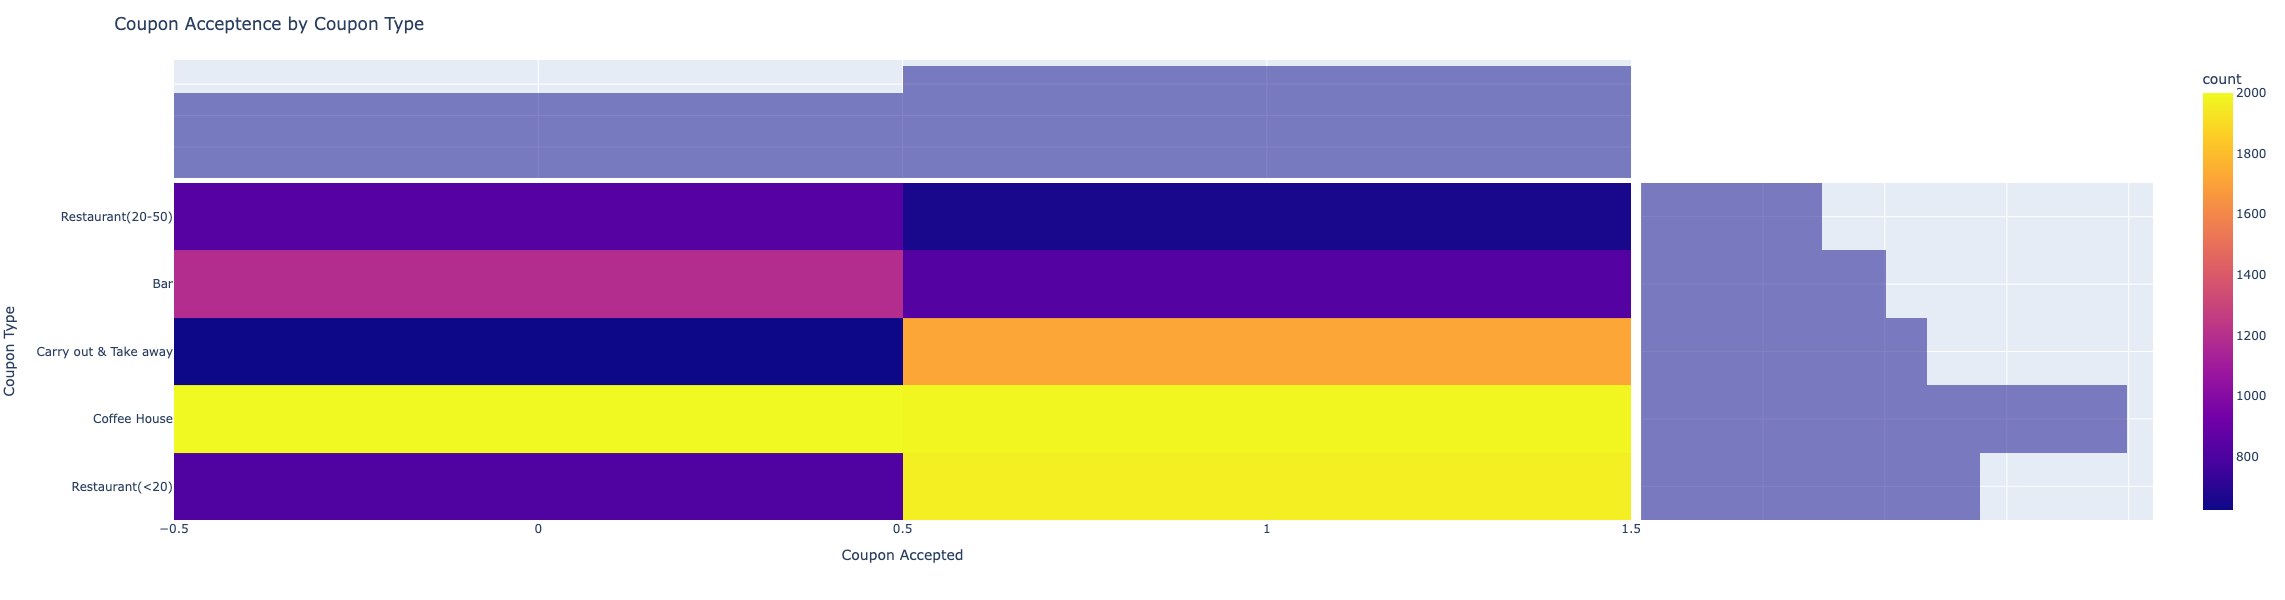

In [586]:
couponType_fig = px.density_heatmap(curated_data, x = "CouponAccepted", y = "coupon", marginal_y = "histogram", marginal_x="histogram", height = 600, width = 800)
                   
couponType_fig.update_layout(
    title="Coupon Acceptence by Coupon Type",
    xaxis_title="Coupon Accepted",
    yaxis_title="Coupon Type"
)

couponType_fig.show()

In [572]:
## Percent of customers who have accepted coupon based on income
income_coupon_accepted_grouped = curated_data.groupby('income')[['CouponAccepted']].mean()*100
income_coupon_accepted_grouped['CouponNotAccepted'] = 100 - income_coupon_accepted_grouped['CouponAccepted']
income_coupon_accepted_grouped

CouponAccepted  CouponNotAccepted
income                                             
$100000 or More        57.775189          42.224811
$12500 - $24999        57.369863          42.630137
$25000 - $37499        59.322034          40.677966
$37500 - $49999        56.267409          43.732591
$50000 - $62499        59.456193          40.543807
$62500 - $74999        52.550415          47.449585
$75000 - $87499        48.364486          51.635514
$87500 - $99999        52.901024          47.098976
Less than $12500       59.187621          40.812379

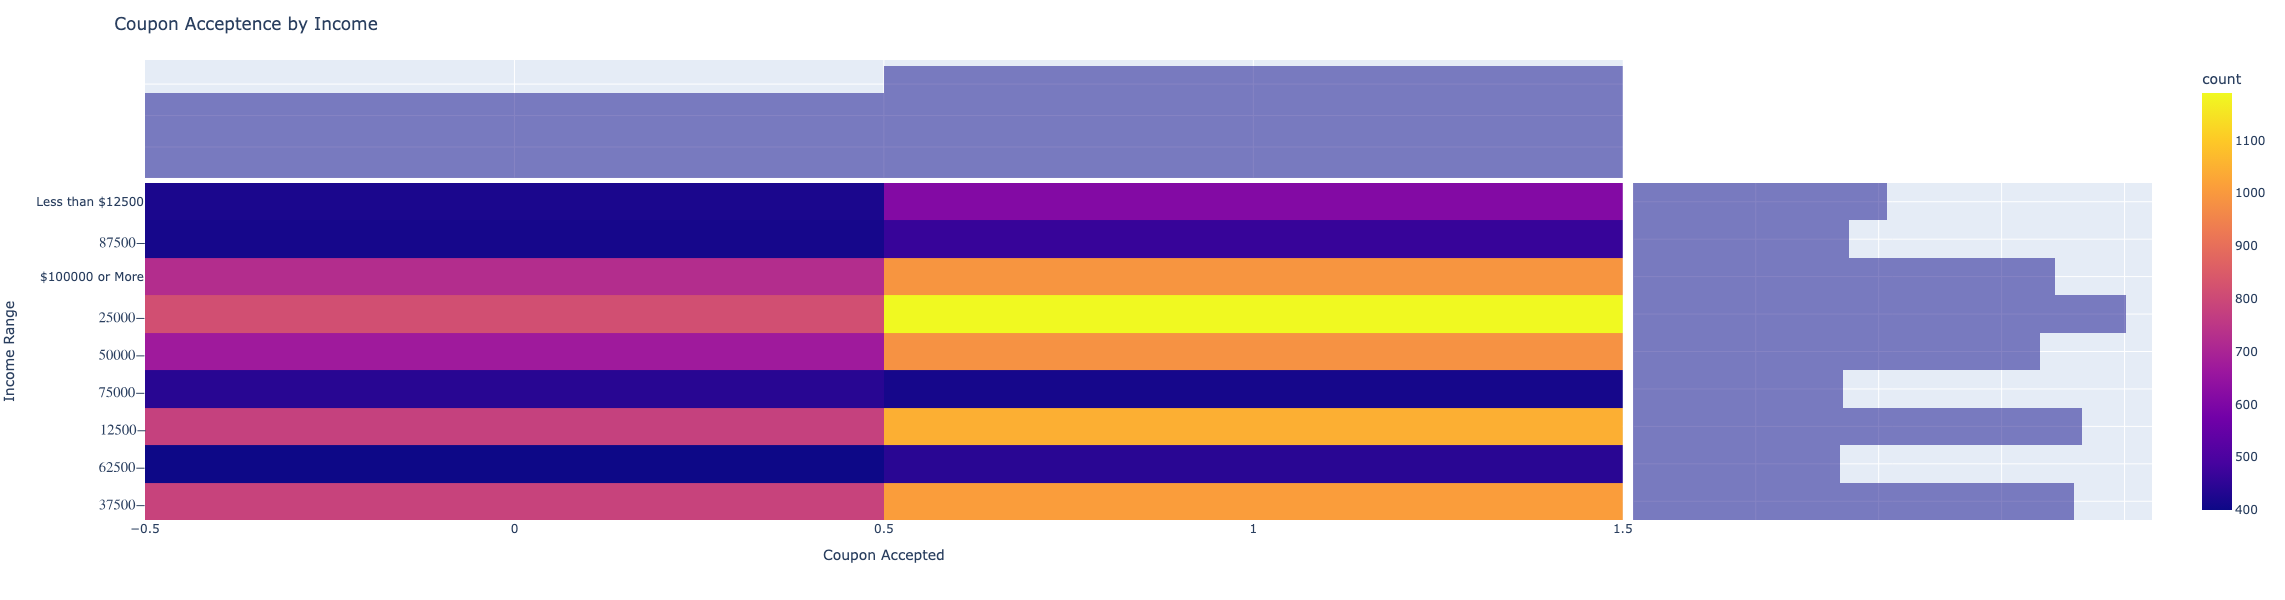

In [587]:
IncomeRange_fig = px.density_heatmap(curated_data, x = "CouponAccepted", y = "income", marginal_y = "histogram", marginal_x="histogram", height = 600, width = 800)
                   
IncomeRange_fig.update_layout(
    title="Coupon Acceptence by Income",
    xaxis_title="Coupon Accepted",
    yaxis_title="Income Range"
)

IncomeRange_fig.show()

In [322]:
edu_coupon_accepted_grouped = curated_data.groupby('education')[['CouponAccepted']].mean()*100
edu_coupon_accepted_grouped['CouponNotAccepted'] = 100 - edu_coupon_accepted_grouped['CouponAccepted']
edu_coupon_accepted_grouped

CouponAccepted  CouponNotAccepted
education                                                                
Associates degree                            55.226481          44.773519
Bachelors degree                             55.401342          44.598658
Graduate degree (Masters or Doctorate)       52.326218          47.673782
High School Graduate                         59.176863          40.823137
Some High School                             71.590909          28.409091
Some college - no degree                     59.583815          40.416185

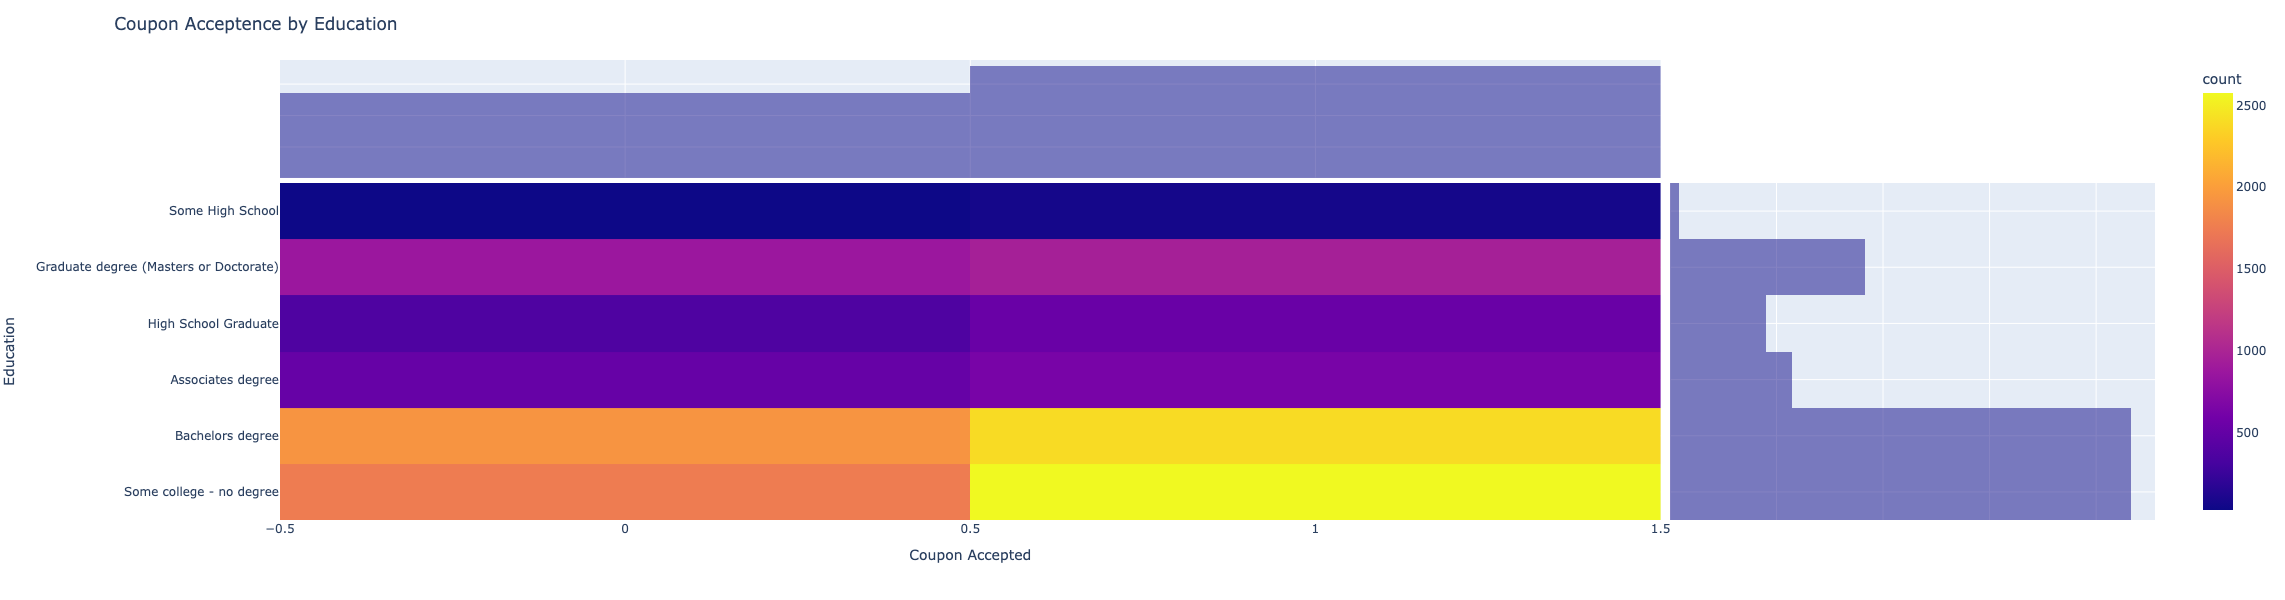

In [588]:
edu_fig = px.density_heatmap(curated_data, x = "CouponAccepted", y = "education", marginal_y = "histogram", marginal_x="histogram", height = 600, width = 800)
                   
edu_fig.update_layout(
    title="Coupon Acceptence by Education",
    xaxis_title="Coupon Accepted",
    yaxis_title="Education"
)

edu_fig.show()

In [323]:
curated_data.groupby('education')[['CouponAccepted']].sum()

CouponAccepted
education                                             
Associates degree                                  634
Bachelors degree                                  2395
Graduate degree (Masters or Doctorate)             956
High School Graduate                               532
Some High School                                    63
Some college - no degree                          2577

5. Use a bar plot to visualize the `coupon` column.

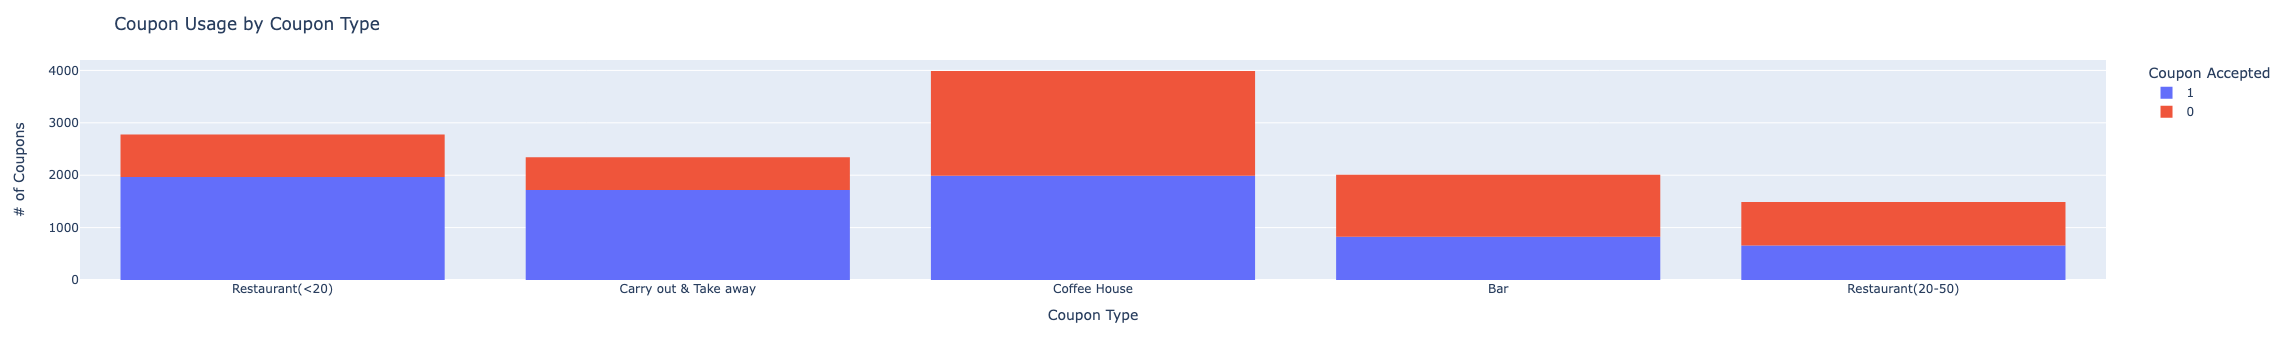

In [496]:
# create the stacked bar chart
fig = px.histogram(curated_data, x='coupon', color='CouponAccepted')

# update the layout
fig.update_layout(title='Coupon Usage by Coupon Type',
                  xaxis_title='Coupon Type',
                  yaxis_title='# of Coupons',
                  legend_title='Coupon Accepted')

# show the chart
fig.show()

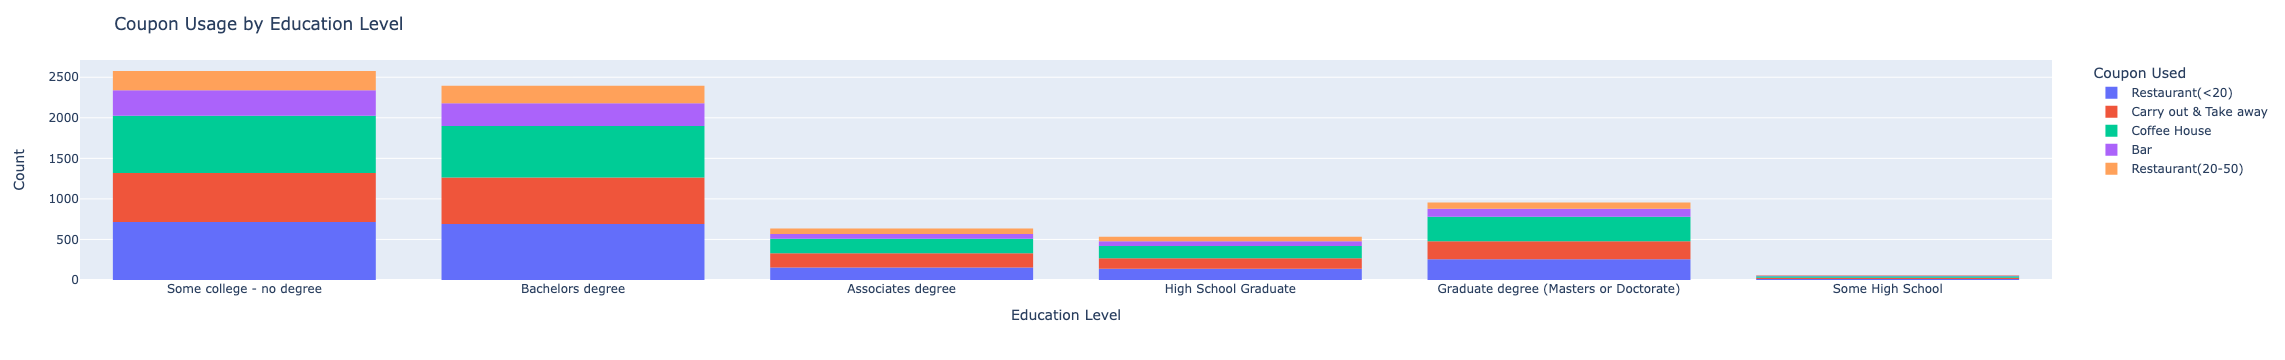

In [499]:
# create the stacked bar chart
fig = px.histogram(curated_data.query('CouponAccepted ==1'), x='education', color='coupon')

# update the layout
fig.update_layout(title='Coupon Usage by Education Level',
                  xaxis_title='Education Level',
                  yaxis_title='Count',
                  legend_title='Coupon Used')

# show the chart
fig.show()

Text(0.5, 1.0, 'Distribution of Coupons Accepted/Rejected based on coupon')

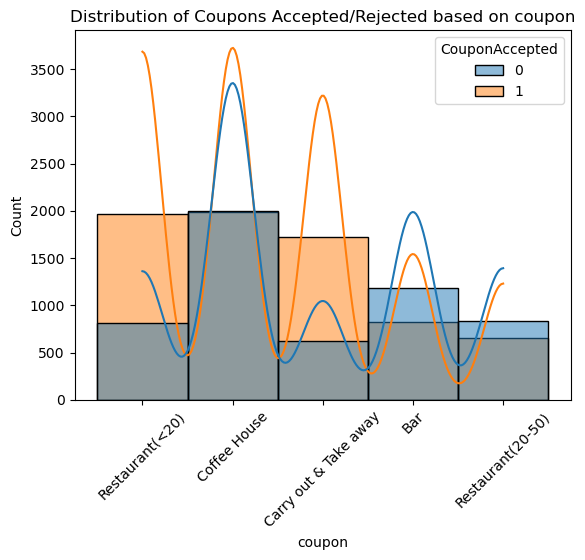

In [328]:
sns.histplot(curated_data, x='coupon', hue='CouponAccepted', kde=True)
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on coupon")

6. Use a histogram to visualize the temperature column.

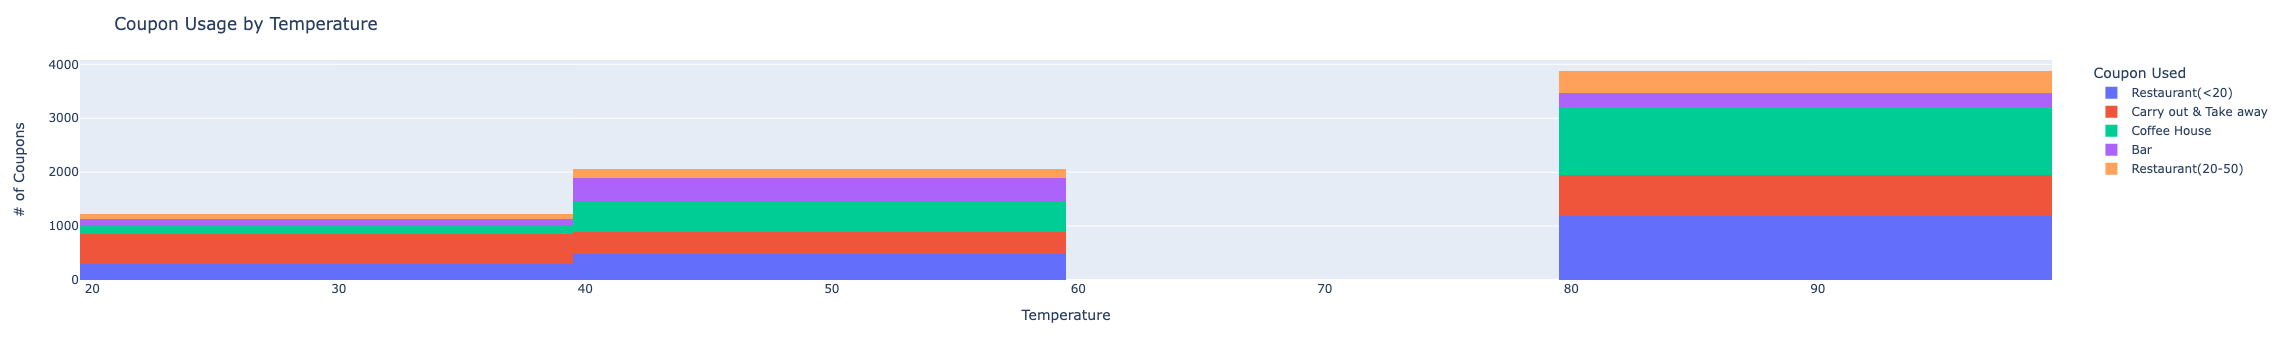

In [500]:
# create the stacked bar chart
fig = px.histogram(curated_data.query('CouponAccepted ==1'), x='temperature', color='coupon')

# update the layout
fig.update_layout(title='Coupon Usage by Temperature',
                  xaxis_title='Temperature',
                  yaxis_title='# of Coupons',
                  legend_title='Coupon Used')

# show the chart
fig.show()

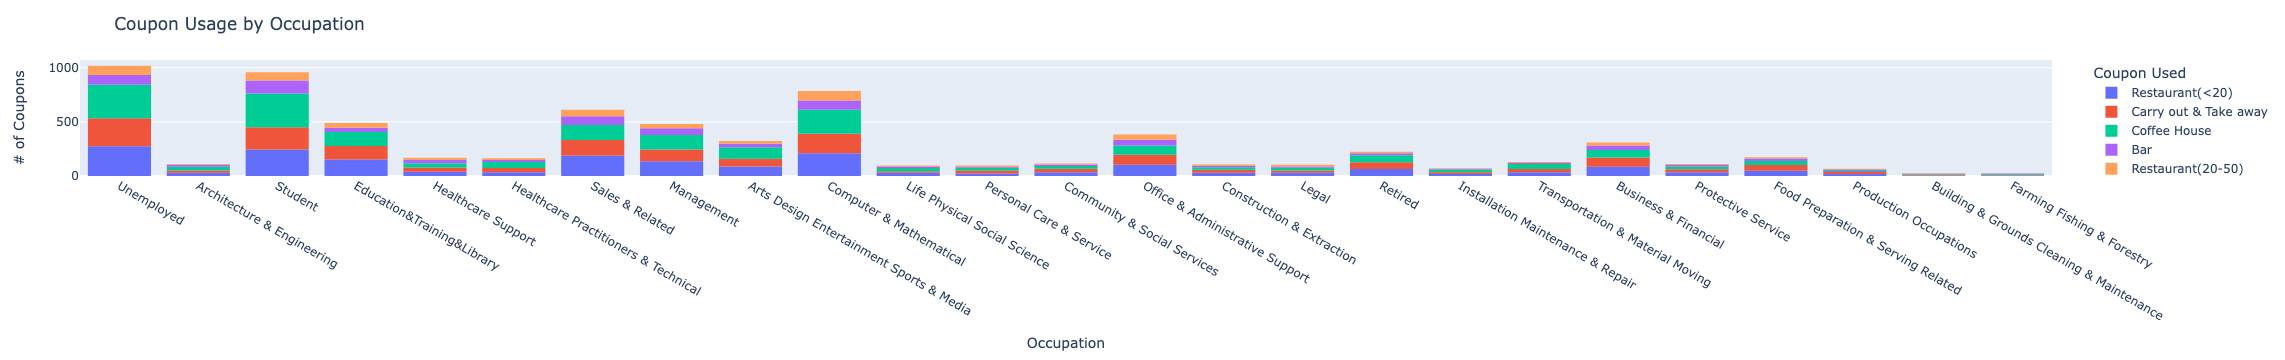

In [592]:
# create the stacked bar chart
fig = px.histogram(curated_data.query('CouponAccepted ==1'), x='occupation', color='coupon')

# update the layout
fig.update_layout(title='Coupon Usage by Occupation',
                  xaxis_title='Occupation',
                  yaxis_title='# of Coupons',
                  legend_title='Coupon Used')

# show the chart
fig.show()

Text(0.5, 1.0, 'Distribution of Coupons Accepted/Rejected based on temperature')

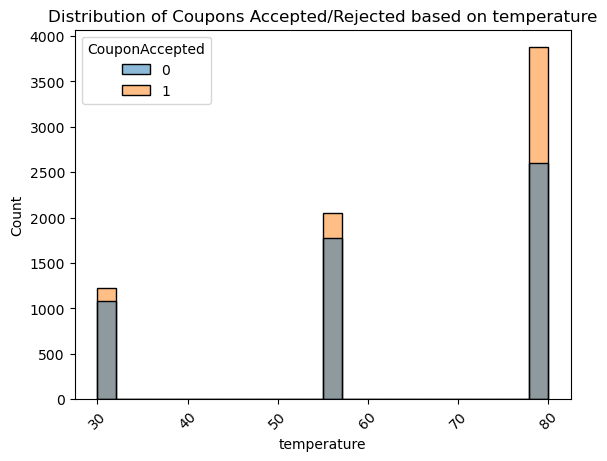

In [332]:
sns.histplot(curated_data, x='temperature', hue='CouponAccepted')
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on temperature")

Text(0.5, 1.0, 'Distribution of Coupons Accepted/Rejected based on weather')

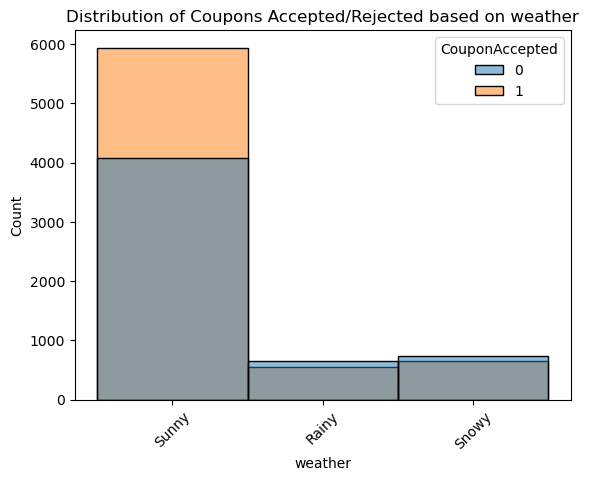

In [333]:
sns.histplot(curated_data, x='weather', hue='CouponAccepted')
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on weather")

Text(0.5, 1.0, 'Distribution of Coupons Accepted/Rejected based on Income')

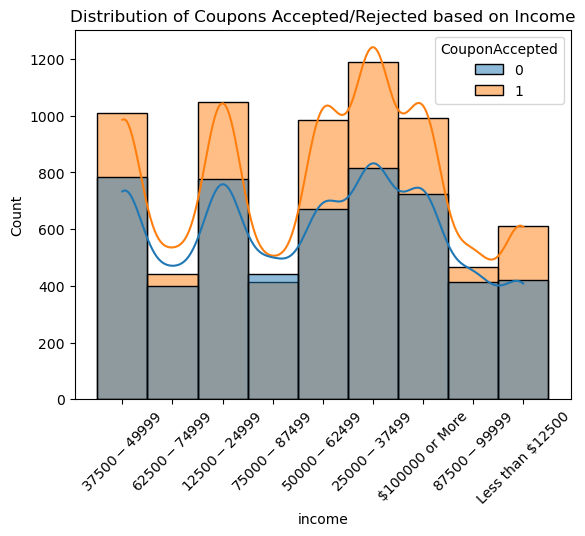

In [352]:
sns.histplot(curated_data, x='income', hue='CouponAccepted', kde=True)
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on Income")

Text(0.5, 1.0, 'Distribution of Coupons Accepted/Rejected based on Time of the day')

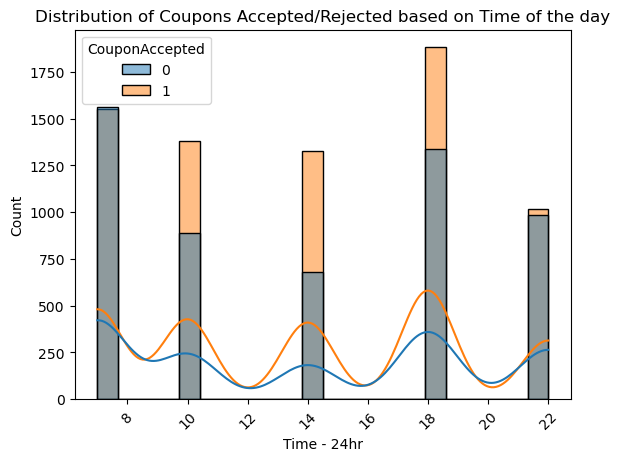

In [335]:
sns.histplot(curated_data, x='Time - 24hr', hue='CouponAccepted', kde=True)
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on Time of the day")

Text(0.5, 1.0, 'Distribution of Coupons Accepted/Rejected based on destination')

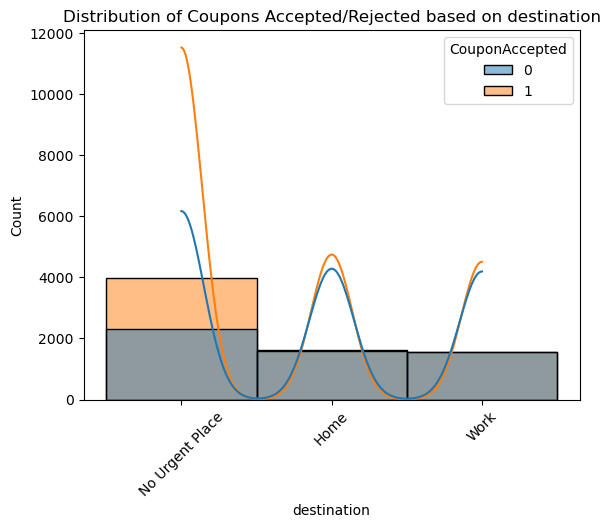

In [336]:
sns.histplot(curated_data, x='destination', hue='CouponAccepted', kde=True)
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on destination")

Text(0.5, 1.0, 'Distribution of Coupons Accepted/Rejected based on passanger')

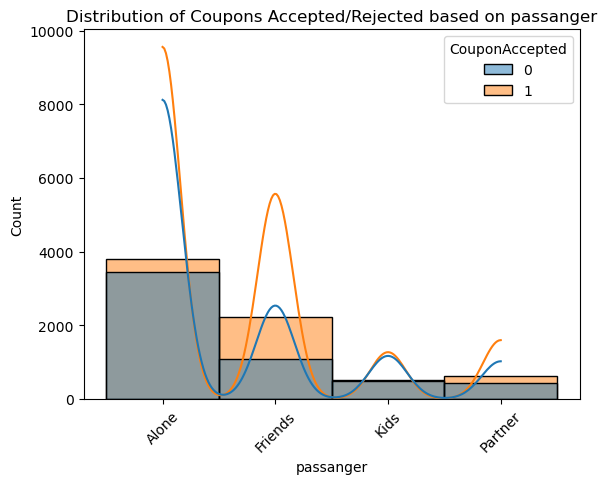

In [337]:
sns.histplot(curated_data, x='passanger', hue='CouponAccepted', kde=True)
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on passanger")

Text(0.5, 1.0, 'Distribution of Coupons Accepted/Rejected based on Coupon Expiry')

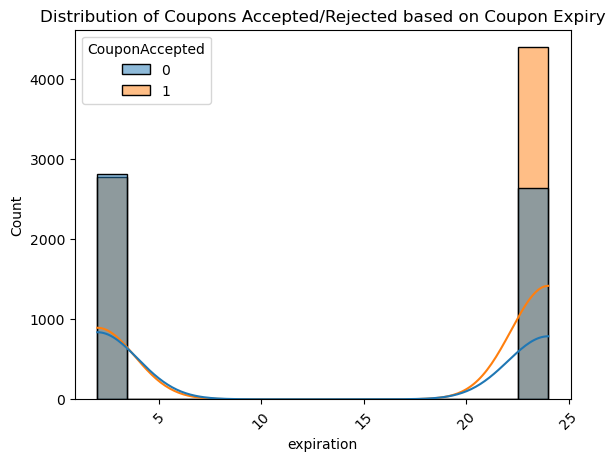

In [339]:
sns.histplot(curated_data, x='expiration', hue='CouponAccepted', kde=True)
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on Coupon Expiry")

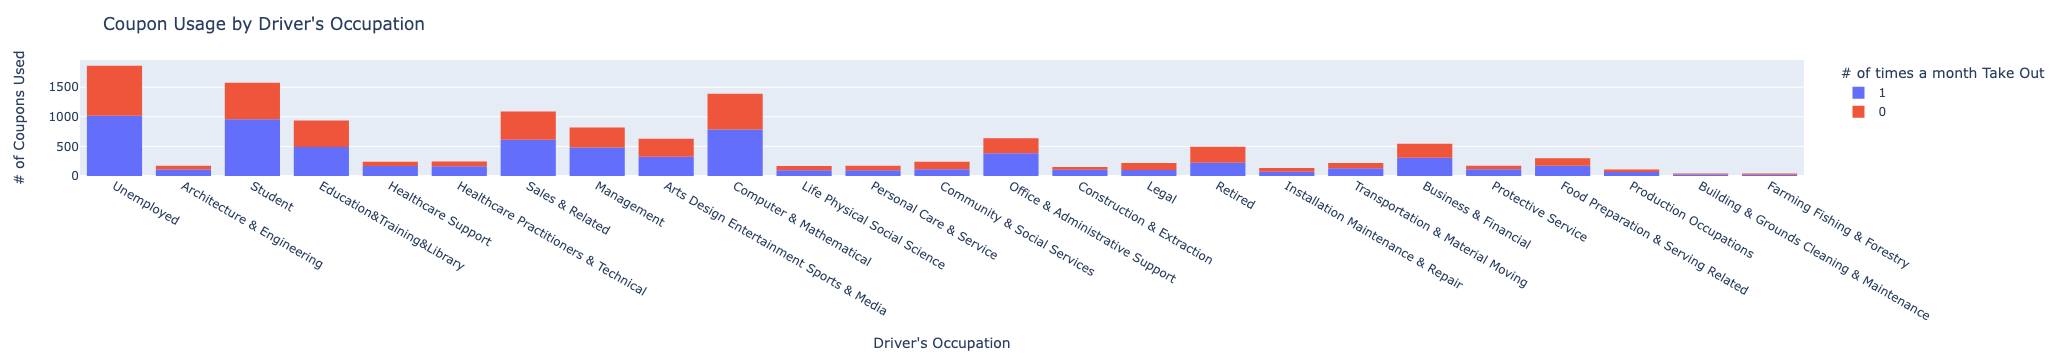

In [523]:
fig = px.histogram(curated_data, x='occupation', color='CouponAccepted')

# update the layout
fig.update_layout(title="Coupon Usage by Driver's Occupation",
                  xaxis_title="Driver's Occupation",
                  yaxis_title='# of Coupons Used',
                  legend_title='Coupon Accepted')

# show the chart
fig.show()

Text(0.5, 1.0, 'Distribution of Coupons Accepted/Rejected based on Gender')

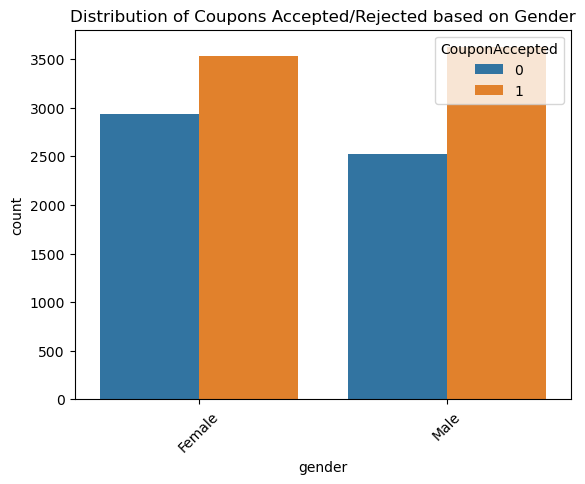

In [520]:
sns.countplot(curated_data, x='gender', hue='CouponAccepted')
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on Gender")

Text(0.5, 1.0, 'Distribution of Coupons Accepted/Rejected based on Age')

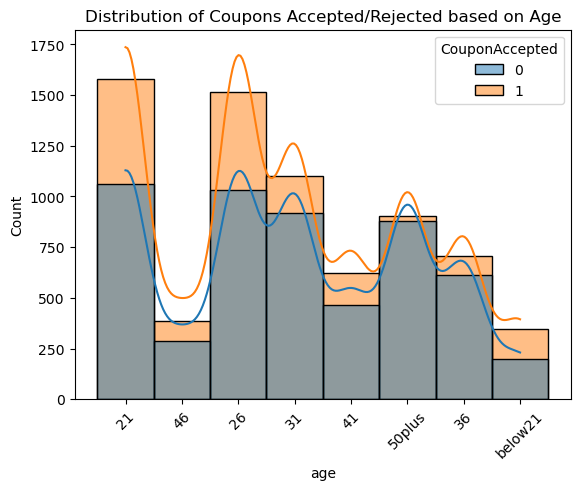

In [354]:
sns.histplot(curated_data, x='age', hue='CouponAccepted', kde=True)
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on Age")

Text(0.5, 1.0, 'Distribution of Coupons Accepted/Rejected based on Children')

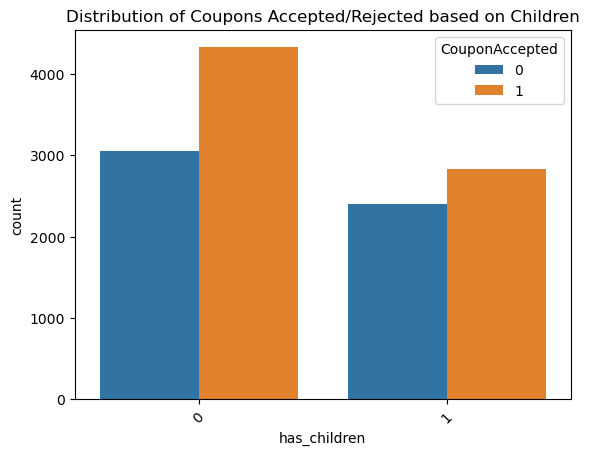

In [521]:
sns.countplot(curated_data, x='has_children', hue='CouponAccepted')
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on Children")

Text(0.5, 1.0, 'Distribution of Coupons Accepted/Rejected based on Car')

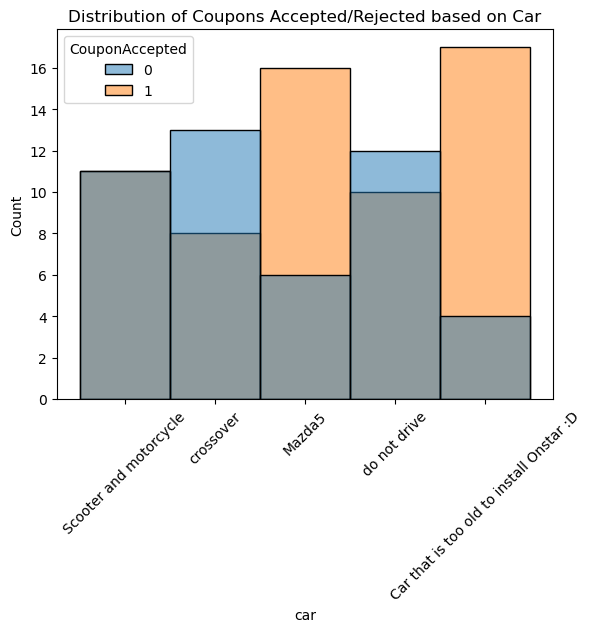

In [522]:
sns.histplot(curated_data, x='car', hue='CouponAccepted')
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on Car")

Text(0.5, 1.0, 'Distribution of Coupons Accepted/Rejected based on Marital Status')

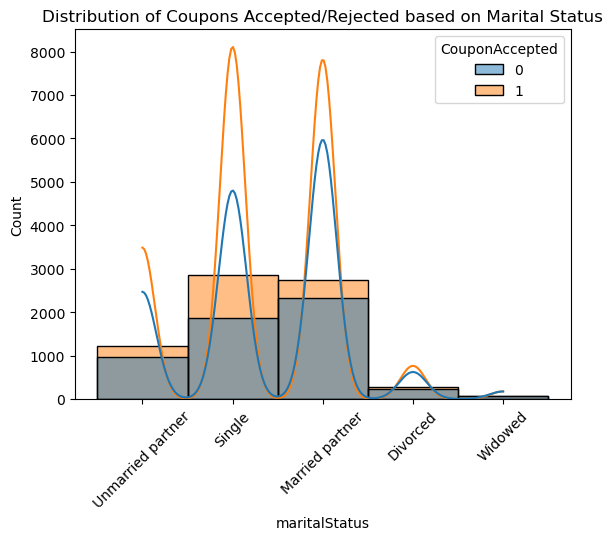

In [364]:
sns.histplot(curated_data, x='maritalStatus', hue='CouponAccepted', kde=True)
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on Marital Status")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [340]:
## Dataframe with just bar coupons
bar_coupons_data = curated_data[curated_data['coupon']=='Bar']
bar_coupons_accepted_data = bar_coupons_data[bar_coupons_data['CouponAccepted'] == 1]
bar_coupons_accepted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 13 to 12652
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           824 non-null    object
 1   passanger             824 non-null    object
 2   weather               824 non-null    object
 3   temperature           824 non-null    int64 
 4   Time - 24hr           824 non-null    int64 
 5   coupon                824 non-null    object
 6   expiration            824 non-null    int64 
 7   gender                824 non-null    object
 8   age                   824 non-null    object
 9   maritalStatus         824 non-null    object
 10  has_children          824 non-null    int64 
 11  education             824 non-null    object
 12  occupation            824 non-null    object
 13  income                824 non-null    object
 14  car                   3 non-null      object
 15  Bar                   816 non-null    obje

2. What proportion of bar coupons were accepted?


In [403]:
##Percent of bar coupons that were accepted
print('For every 100 coupons, ' + str(bar_coupons_data['CouponAccepted'].mean()*100) + ' coupons were accepted')

For every 100 coupons, 40.99502487562189 coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [411]:
bar_fewer_than_3_times = bar_coupons_accepted_data[bar_coupons_accepted_data['Bar'].isin(['never', 'less1', '1~3'])].shape[0]
bar_more_than_3_times = bar_coupons_accepted_data[bar_coupons_accepted_data['Bar'].isin(['4~8', 'gt8'])].shape[0]

print('Folks who accepted the coupon and went to bar less than 3 times a month: ' + str(bar_fewer_than_3_times))
print('Folks who accepted the coupon and went to bar more than 3 times a month: ' + str(bar_more_than_3_times))

Folks who accepted the coupon and went to bar less than 3 times a month: 663
Folks who accepted the coupon and went to bar more than 3 times a month: 153


In [416]:
## Validating my answer from above
bar_coupons_accepted_data.groupby('Bar')['CouponAccepted'].value_counts()

Bar    CouponAccepted
1~3    1                 257
4~8    1                 117
gt8    1                  36
less1  1                 250
never  1                 156
Name: count, dtype: int64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [417]:
over_25 = ['26', '31', '36', '41', '46', '50plus']
more_than_once = ['1~3', '4~8', 'gt8']

bar_over_25_and_go_more_than_once = bar_coupons_accepted_data[bar_coupons_accepted_data['age'].isin(over_25) 
                                                              & bar_coupons_accepted_data['Bar'].isin(more_than_once)].shape[0]

non_25_go_to_bar_less_than_once = bar_coupons_accepted_data.shape[0] - bar_over_25_and_go_more_than_once


print('Drivers who accepted the coupons and go to a bar more than once a month and are over the age of 25 are: ' + str(bar_over_25_and_go_more_than_once))
print('Remaining drivers who accepted the coupons and go to the bar are: ' + str(non_25_go_to_bar_less_than_once))

Drivers who accepted the coupons and go to a bar more than once a month and are over the age of 25 are: 292
Remaining drivers who accepted the coupons and go to the bar are: 532


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

In [418]:
no_kids_passanger = ['Alone', 'Friends', 'Parner']

bar_more_than_once_no_kid_other_than_FFF = bar_coupons_accepted_data[bar_coupons_accepted_data['passanger'].isin(no_kids_passanger) 
                                                                     & (bar_coupons_accepted_data['occupation'] != 'Farming Fishing & Forestry')
                                                                     & bar_coupons_accepted_data['Bar'].isin(more_than_once)].shape[0]

non_FFF_noKids_go_to_bar_less_than_once = bar_coupons_accepted_data.shape[0] - bar_more_than_once_no_kid_other_than_FFF

print('Drivers who accepted the coupons and go to a bar more than once a month and are not in Farming Fishing & Forestry and traveling with no kids: ' + str(bar_more_than_once_no_kid_other_than_FFF))
print('Remaining drivers who accepted the coupons and go to the bar are: ' + str(non_FFF_noKids_go_to_bar_less_than_once))

Drivers who accepted the coupons and go to a bar more than once a month and are not in Farming Fishing & Forestry and traveling with no kids: 348
Remaining drivers who accepted the coupons and go to the bar are: 476


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [409]:
under_30 = ['21', '26', 'below21']
less_than_50K = ['$37500 - $49999', '$12500 - $24999','$25000 - $37499', 'Less than $12500']

bar_more_than_once_no_kid_not_widowed = bar_coupons_accepted_data[bar_coupons_accepted_data['passanger'].isin(no_kids_passanger) 
                                                                  & (bar_coupons_accepted_data['maritalStatus'] != 'Widowed') 
                                                                  & bar_coupons_accepted_data['Bar'].isin(more_than_once)].shape[0]

bar_more_than_once_under_age_30 = bar_coupons_accepted_data[bar_coupons_accepted_data['age'].isin(under_30) 
                                                            & bar_coupons_accepted_data['Bar'].isin(more_than_once)].shape[0]

restaurant_lt20_coupons_data = curated_data[curated_data['coupon']=='Restaurant(<20)']
restaurant_lt20_accepted_coupons_data = restaurant_lt20_coupons_data[restaurant_lt20_coupons_data['CouponAccepted'] == 1]

restaurant_lt20_4times_50K_income = restaurant_lt20_accepted_coupons_data[restaurant_lt20_accepted_coupons_data['RestaurantLessThan20'].isin(['4~8', '>8'])
                                                                          & restaurant_lt20_accepted_coupons_data['income'].isin(less_than_50K)].shape[0]

print('Drivers going to bar more than once and do not have kid in the car and are not widowed: ' + str(bar_more_than_once_no_kid_not_widowed))
print('Drivers who go to bar more than once a month and are under the age of 30: ' + str(bar_more_than_once_under_age_30))
print('Drivers who go to cheap restaurants more than 4 times a month and income less than 40K: ' + str(restaurant_lt20_4times_50K_income))

Drivers going to bar more than once and do not have kid in the car and are not widowed: 348
Drivers who go to bar more than once a month and are under the age of 30: 249
Drivers who go to cheap restaurants more than 4 times a month and income less than 40K: 359


In [ ]:
sns.histplot(bar_coupons_accepted_data, x='maritalStatus', hue='passanger', kde=True)
plt.xticks(rotation=45)
plt.title("Distribution of Coupons Accepted/Rejected based on Marital Status")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Analysis on drivers who accepted the Bar Coupons
- Drivers who got to the bar less than 3 times a month accept the coupon more (663) than the drivers who go more to the bar (153).
- Though there were ~40% of the coupons delivered to the drivers were accepted, Bar coupons are not the highest accepted coupons.
- Drivers who are less than 25 years of age and who go to the bar less than once a month tend to use the coupon more (532) than the other way round(292).
- From the general data analysis above - drivers who have "Some College - No Degree" or a "Bachelors Degree" tend to use the coupon more than others.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [407]:
## Dataframe with just bar coupons
carryOut_coupons_data = curated_data[curated_data['coupon']=='Carry out & Take away']
carryOut_coupons_accepted_data = carryOut_coupons_data[carryOut_coupons_data['CouponAccepted'] == 1]
carryOut_coupons_accepted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1720 entries, 2 to 12680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1720 non-null   object
 1   passanger             1720 non-null   object
 2   weather               1720 non-null   object
 3   temperature           1720 non-null   int64 
 4   Time - 24hr           1720 non-null   int64 
 5   coupon                1720 non-null   object
 6   expiration            1720 non-null   int64 
 7   gender                1720 non-null   object
 8   age                   1720 non-null   object
 9   maritalStatus         1720 non-null   object
 10  has_children          1720 non-null   int64 
 11  education             1720 non-null   object
 12  occupation            1720 non-null   object
 13  income                1720 non-null   object
 14  car                   13 non-null     object
 15  Bar                   1715 non-null   obje

In [406]:
curated_data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [443]:
#Overall percent of coupons accepted
carryOut_coupons_accepted = carryOut_coupons_data['CouponAccepted'].mean()*100
print('For every 100 Carry Away coupons delivered, customers accepted ' + str(carryOut_coupons_accepted) + ' coupons.')

For every 100 Carry Away coupons delivered, customers accepted, 73.37883959044369 coupons.


In [430]:
carryOut_coupons_accepted_data.groupby('CarryAway')['CouponAccepted'].value_counts()

CarryAway  CouponAccepted
1~3        1                 624
4~8        1                 606
<1         1                 234
>8         1                 215
never      1                  23
Name: count, dtype: int64

In [435]:
edu_most_coupons = ['Some college - no degree', 'Bachelors degree']
carryOut_coupons_accepted_data.groupby('education')['CouponAccepted'].value_counts()

education                               CouponAccepted
Associates degree                       1                 175
Bachelors degree                        1                 572
Graduate degree (Masters or Doctorate)  1                 222
High School Graduate                    1                 131
Some High School                        1                  15
Some college - no degree                1                 605
Name: count, dtype: int64

In [439]:
carryOut_coupons_accepted_data.query('education in @edu_most_coupons').groupby('CarryAway')['CouponAccepted'].value_counts()

CarryAway  CouponAccepted
1~3        1                 438
4~8        1                 415
<1         1                 138
>8         1                 155
never      1                  18
Name: count, dtype: int64

In [445]:
carryOut_coupons_accepted_data.groupby('has_children')['CouponAccepted'].value_counts()

has_children  CouponAccepted
0             1                 971
1             1                 749
Name: count, dtype: int64

weather  CouponAccepted
Rainy    1                  193
Snowy    1                  215
Sunny    1                 1312
Name: count, dtype: int64

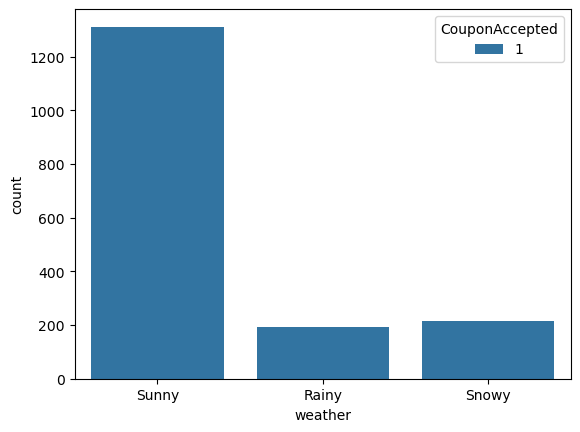

In [501]:
sns.countplot(carryOut_coupons_accepted_data, x='weather', hue='CouponAccepted')
carryOut_coupons_accepted_data.groupby('weather')['CouponAccepted'].value_counts()

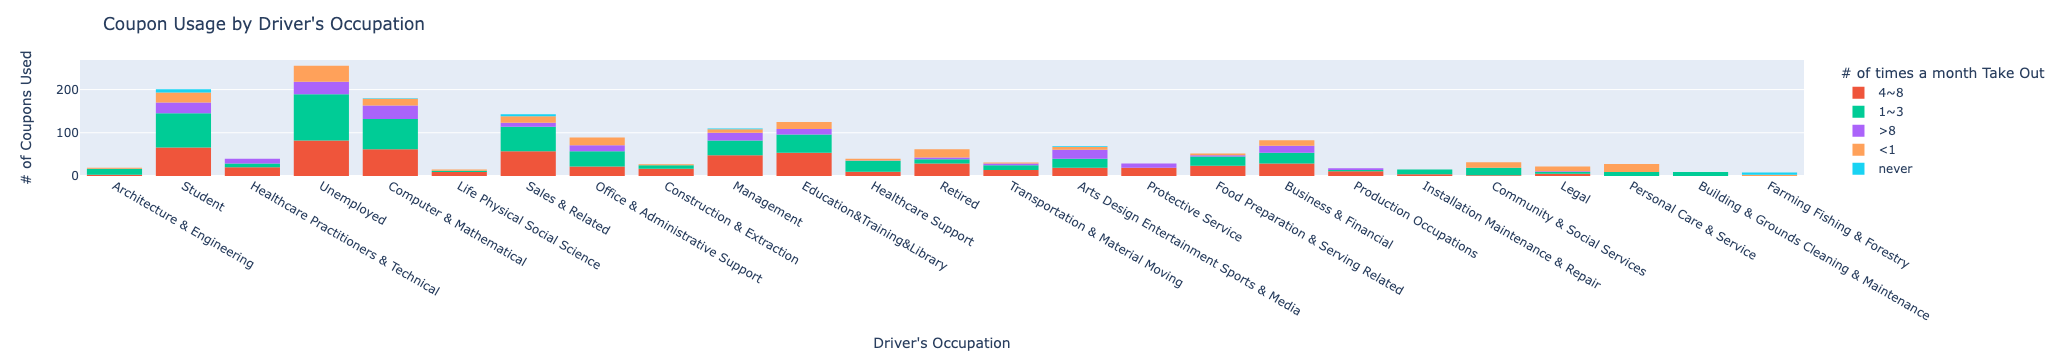

In [505]:
fig = px.histogram(carryOut_coupons_accepted_data, x='occupation', color='CarryAway')

# update the layout
fig.update_layout(title="Coupon Usage by Driver's Occupation",
                  xaxis_title="Driver's Occupation",
                  yaxis_title='# of Coupons Used',
                  legend_title='# of times a month Take Out')

# show the chart
fig.show()

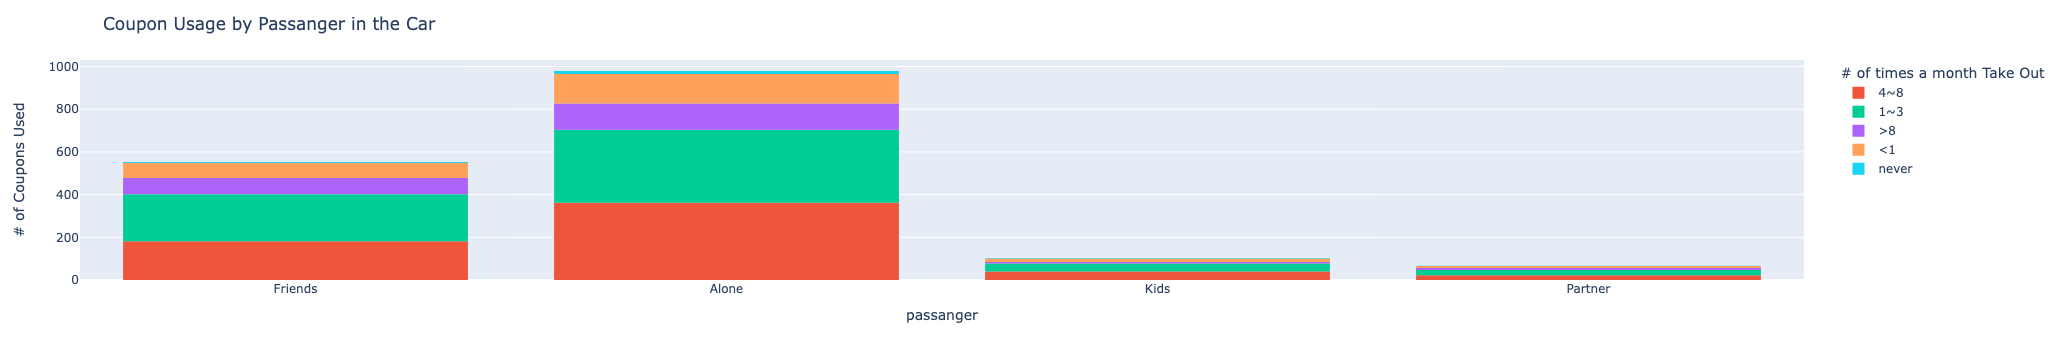

In [504]:
fig = px.histogram(carryOut_coupons_accepted_data, x='passanger', color='CarryAway')

# update the layout
fig.update_layout(title='Coupon Usage by Passanger in the Car',
                  xaxis_title='passanger',
                  yaxis_title='# of Coupons Used',
                  legend_title='# of times a month Take Out')

# show the chart
fig.show()

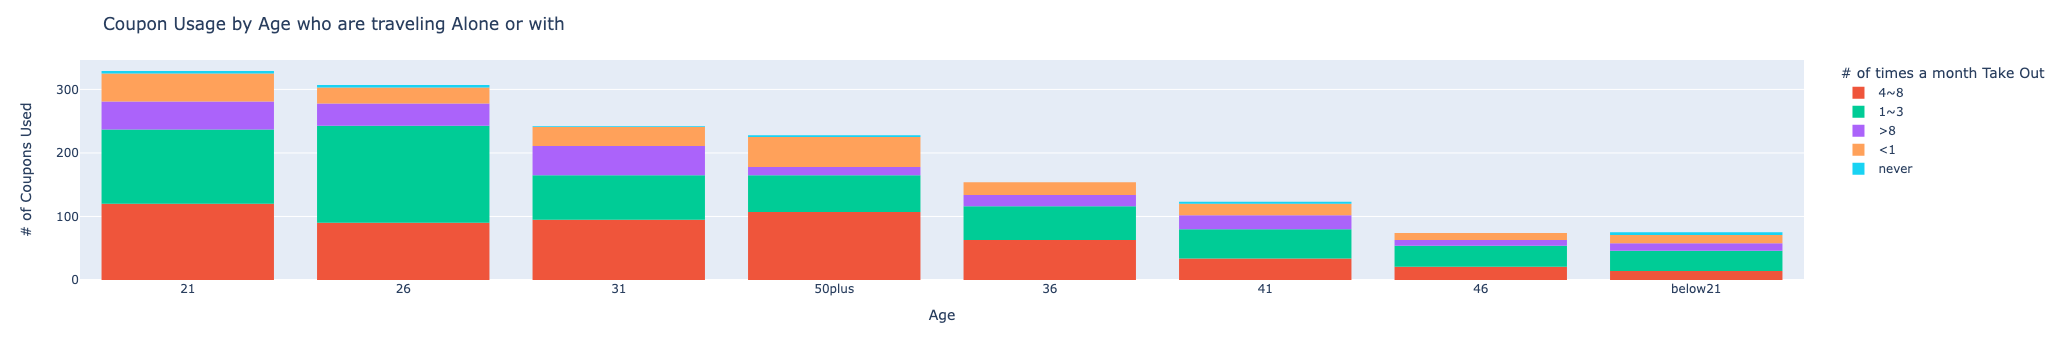

In [508]:
list = ['Friends', 'Alone']
fig = px.histogram(carryOut_coupons_accepted_data.query('passanger in @list'), x='age', color='CarryAway')

# update the layout
fig.update_layout(title='Coupon Usage by Age who are traveling Alone or with',
                  xaxis_title='Age',
                  yaxis_title='# of Coupons Used',
                  legend_title='# of times a month Take Out')

# show the chart
fig.show()

Text(0, 0.5, 'Coupons Used')

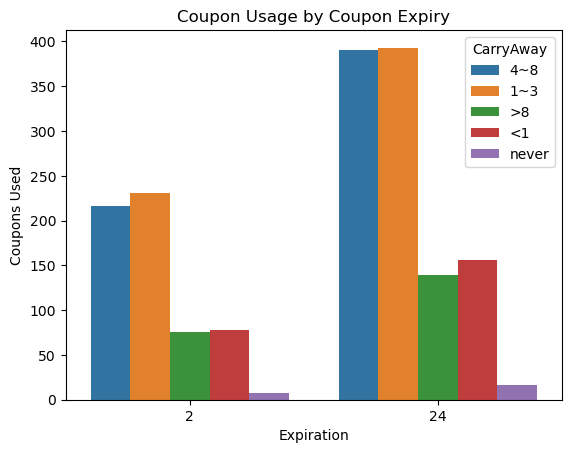

In [518]:
sns.countplot(carryOut_coupons_accepted_data, x='expiration', hue='CarryAway')
plt.title('Coupon Usage by Coupon Expiry')
plt.xlabel('Expiration')
plt.ylabel('Coupons Used')

### Analysis on drivers who accepted the Carry Out and Takeaway Coupons

#### For this analysis, I intentionally used more plots than querying to do more hands on plotting vs querying as in bar coupon analysis I was doing more querying.

- General tendency from the plots above shows that drivers who go out more than once (even more for drivers who go 4-8 times) use the Carry Away coupon more.
- Drivers who are driving alone or with Friends use the coupon more. Also drivers who are in the age range of 20-31 or over 50 use the coupon more than others.
- Drivers who are students, unemployed, computer & mathematics professionals tend to use Carry Away coupon more than others.
- Coupons are used on sunny days more than other days. When temperature is high.
- Coupons that expire in 24 hours are more preferable than coupons that expire in 2hrs.